In [1]:
import os, sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib_venn import venn3
import subprocess
import seaborn as sns

In [22]:
bim = pd.read_csv("Data/PPMI_merged.bim",sep="\t", header = None)
bim.head()

,0,1,2,3,4,5
0,1,NeuroX_PARK7_Pro158del,0,0,0,I
1,1,NeuroX_PINK1_23bp_del_ex7,0,0,0,I
2,1,NeuroX_PINK1_534_535insQ,0,0,0,D
3,1,NeuroX_PINK1_Asp525fs,0,0,0,D
4,1,NeuroX_PINK1_Cys549fs,0,0,0,I


In [34]:
bad1 = bim[ (bim.iloc[:,4] == 'A') & (bim.iloc[:,5] == 'T')]
bad2 = bim[ (bim.iloc[:,4] == 'T') & (bim.iloc[:,5] == 'A')]
bad3 = bim[ (bim.iloc[:,4] == 'C') & (bim.iloc[:,5] == 'G')]
bad4 = bim[ (bim.iloc[:,4] == 'G') & (bim.iloc[:,5] == 'C')]

badSnps = pd.concat([bad1,bad2,bad3,bad4])
badSnps_set = set(badSnps.iloc[:,1].values.tolist())

pd.DataFrame(list(badSnps_set)).to_csv("Data/QC/badSnps.txt",header=False,index=False)

In [35]:
!plink --bfile Data/PPMI_merged --autosome --exclude Data/QC/badSnps.txt --make-bed --out Data/QC/PPMI_merged_filtered 

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_filtered.log.
Options in effect:
  --autosome
  --bfile Data/PPMI_merged
  --exclude Data/QC/badSnps.txt
  --make-bed
  --out Data/QC/PPMI_merged_filtered

32768 MB RAM detected; reserving 16384 MB for main workspace.
447006 out of 457171 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
--exclude: 413138 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.955531.
413138 variants and 520 people pass filters and QC.
Note: No phenoty

In [36]:
fil = pd.read_csv("Data/QC/PPMI_merged_filtered.bim",sep="\t", header = None)
fil

,0,1,2,3,4,5
0,1,NeuroX_PARK7_Pro158del,0,0,0,I
1,1,NeuroX_PINK1_23bp_del_ex7,0,0,0,I
2,1,NeuroX_PINK1_534_535insQ,0,0,0,D
3,1,NeuroX_PINK1_Asp525fs,0,0,0,D
4,1,NeuroX_PINK1_Cys549fs,0,0,0,I
...,...,...,...,...,...,...
413133,22,exm2017996,0,51176664,0,A
413134,22,exm2017998,0,51176734,T,C
413135,22,exm1624282,0,51177812,0,C
413136,22,exm1624294,0,51178286,0,C


In [37]:
snps = list()
for i in range(len(fil)):
    chr = fil.loc[i,0]
    if(chr == 23 or chr == 24 or chr == 25):
        snp = fil.loc[i,1]
        snps.append(snp)
        
with open('Data/CHR_Filtered/SNPS_23_24.txt', 'w') as f:
    for item in snps:
        f.write("%s\n" % item)

In [42]:
!plink --bfile Data/QC/PPMI_merged_filtered --exclude Data/CHR_Filtered/SNPS_23_24.txt --make-bed --out Data/QC/PPMI_merged_autosomal

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_autosomal.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_filtered
  --exclude Data/CHR_Filtered/SNPS_23_24.txt
  --make-bed
  --out Data/QC/PPMI_merged_autosomal

32768 MB RAM detected; reserving 16384 MB for main workspace.
413138 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
--exclude: 413138 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.955531.
413138 variants and 520 people pass filters and QC.
Note: No phenoty

### QC Steps

In [43]:
!plink --bfile Data/QC/PPMI_merged_autosomal --geno 0.1 --make-bed --out Data/QC/PPMI_merged_autosomal_geno

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_autosomal_geno.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_autosomal
  --geno 0.1
  --make-bed
  --out Data/QC/PPMI_merged_autosomal_geno

32768 MB RAM detected; reserving 16384 MB for main workspace.
413138 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.955531.
20811 variants removed due to missing genotype data (--geno).
392327 variants and 520 people pass filters and QC.
Note: No phen

In [44]:
tmp = pd.read_csv("Data/QC/PPMI_merged_autosomal_geno.bim",sep="\t", header = None)
tmp

,0,1,2,3,4,5
0,1,NeuroX_PARK7_Pro158del,0,0,0,I
1,1,NeuroX_PINK1_23bp_del_ex7,0,0,0,I
2,1,NeuroX_PINK1_534_535insQ,0,0,0,D
3,1,NeuroX_PINK1_Asp525fs,0,0,0,D
4,1,NeuroX_PINK1_Cys549fs,0,0,0,I
...,...,...,...,...,...,...
392322,22,exm2017996,0,51176664,0,A
392323,22,exm2017998,0,51176734,T,C
392324,22,exm1624282,0,51177812,0,C
392325,22,exm1624294,0,51178286,0,C


In [45]:
!plink --bfile Data/QC/PPMI_merged_autosomal_geno --mind 0.5 --make-bed --out Data/QC/PPMI_merged_autosomal_mind

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_autosomal_mind.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_autosomal_geno
  --make-bed
  --mind 0.5
  --out Data/QC/PPMI_merged_autosomal_mind

32768 MB RAM detected; reserving 16384 MB for main workspace.
392327 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.997872.
392327 variants and 520 people pass filters and QC.
Note: No pheno

In [46]:
tmp = pd.read_csv("Data/QC/PPMI_merged_autosomal_mind.bim",sep="\t", header = None)
tmp

,0,1,2,3,4,5
0,1,NeuroX_PARK7_Pro158del,0,0,0,I
1,1,NeuroX_PINK1_23bp_del_ex7,0,0,0,I
2,1,NeuroX_PINK1_534_535insQ,0,0,0,D
3,1,NeuroX_PINK1_Asp525fs,0,0,0,D
4,1,NeuroX_PINK1_Cys549fs,0,0,0,I
...,...,...,...,...,...,...
392322,22,exm2017996,0,51176664,0,A
392323,22,exm2017998,0,51176734,T,C
392324,22,exm1624282,0,51177812,0,C
392325,22,exm1624294,0,51178286,0,C


In [47]:
# 0.05 for not huge datasets (5%)
!plink --bfile Data/QC/PPMI_merged_autosomal_mind --maf 0.05 --make-bed --out Data/QC/PPMI_merged_autosomal_maf

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_autosomal_maf.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_autosomal_mind
  --maf 0.05
  --make-bed
  --out Data/QC/PPMI_merged_autosomal_maf

32768 MB RAM detected; reserving 16384 MB for main workspace.
392327 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.997872.
263114 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
129213 variants and 520 people p

In [48]:
tmp = pd.read_csv("Data/QC/PPMI_merged_autosomal_maf.bim",sep="\t", header = None)
tmp

,0,1,2,3,4,5
0,1,exm269,0,881918,A,G
1,1,exm340_ver2,0,888659,T,C
2,1,exm348,0,889238,A,G
3,1,exm2264981,0,894573,G,A
4,1,exm912,0,949608,A,G
...,...,...,...,...,...,...
129208,22,rs9628185,0,51109992,C,T
129209,22,exm1624089,0,51117580,C,T
129210,22,exm2268429,0,51156078,A,G
129211,22,rs9628187,0,51156666,T,C


In [51]:
!plink --bfile Data/QC/PPMI_merged_autosomal_maf --hwe 1e-06 --make-bed --out Data/QC/PPMI_merged_autosomal_hwe

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_autosomal_hwe.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_autosomal_maf
  --hwe 1e-06
  --make-bed
  --out Data/QC/PPMI_merged_autosomal_hwe

32768 MB RAM detected; reserving 16384 MB for main workspace.
129213 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996545.
--hwe: 256 variants removed due to Hardy-Weinberg exact test.
128957 variants and 520 people pass filters and QC.
Note: No p

In [52]:
tmp = pd.read_csv("Data/QC/PPMI_merged_autosomal_hwe.bim",sep="\t", header = None)
tmp

,0,1,2,3,4,5
0,1,exm269,0,881918,A,G
1,1,exm340_ver2,0,888659,T,C
2,1,exm348,0,889238,A,G
3,1,exm2264981,0,894573,G,A
4,1,exm912,0,949608,A,G
...,...,...,...,...,...,...
128952,22,rs9628185,0,51109992,C,T
128953,22,exm1624089,0,51117580,C,T
128954,22,exm2268429,0,51156078,A,G
128955,22,rs9628187,0,51156666,T,C


# PCA

In [53]:
!plink --bfile Data/QC/PPMI_merged_autosomal_hwe --pca 10 --out Data/QC/PPMI_merged_autosomal_hwe

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/PPMI_merged_autosomal_hwe.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_autosomal_hwe
  --out Data/QC/PPMI_merged_autosomal_hwe
  --pca 10

32768 MB RAM detected; reserving 16384 MB for main workspace.
128957 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
Using up to 11 threads (change this with --threads).
Before main variant filters, 520 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.9966.
128957 variants and 520 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete.
--pca: Results saved t

In [58]:
ah_pca = pd.read_csv('Data/QC/PPMI_merged_autosomal_hwe.eigenvec', sep=' ',header=None)
cnames = ['FID','IID']
for i in range(1,11):
    cnames.append("PC"+str(i))
ah_pca.columns = cnames
ah_pca

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3000,3000,0.009055,-0.020989,-0.006450,0.004679,0.064548,-0.004622,-0.004768,-0.057430,-0.017399,-0.006455
1,3001,3001,0.010821,-0.010432,0.017466,0.008279,-0.033759,0.035920,-0.061804,-0.012103,-0.025155,-0.037460
2,3002,3002,0.010888,0.082272,-0.026729,-0.014567,-0.005203,-0.025331,0.001788,0.009354,0.024951,-0.017407
3,3004,3004,0.014755,-0.023550,0.017395,-0.016206,-0.016462,0.023744,0.015236,-0.109621,0.006488,0.027893
4,3006,3006,0.014192,-0.011787,0.055575,0.078381,0.047014,0.001423,-0.031512,-0.033798,-0.030393,0.041583
...,...,...,...,...,...,...,...,...,...,...,...,...
515,4124,4124,0.016180,-0.011417,0.025328,0.031295,0.016272,-0.075886,0.044644,0.030776,0.048248,0.019448
516,4125,4125,0.003644,0.018138,0.034080,-0.007140,-0.033038,0.069820,0.027495,-0.010757,0.024266,-0.033078
517,4126,4126,0.011471,0.003224,-0.010949,-0.052772,0.017001,-0.005149,0.093209,-0.064223,-0.033085,-0.010455
518,4136,4136,0.006499,-0.035969,-0.029837,-0.062571,-0.038873,-0.039735,0.090198,0.019964,0.086751,0.042351


In [59]:
ppmi_info = pd.read_csv('../PPMI_data/Info files/Screening___Demographics.csv')

In [60]:
tmp_info = ppmi_info.iloc[:,12:19]
tmp_info["PATNO"] = ppmi_info.iloc[:,2].tolist()
tmp_info

,HISPLAT,RAINDALS,RAASIAN,RABLACK,RAHAWOPI,RAWHITE,RANOS,PATNO
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3400
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3401
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3402
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3403
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3404
...,...,...,...,...,...,...,...,...
2248,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5012
2249,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5013
2250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5014
2251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5015


In [61]:
pops = list()
popDict = {0:"Hispanic/Latino", 1:"Indian/Alaska", 2:"Asian", 3:"Black/African American", 4:"Hawaiian/Other Pacif",
           5:"White", 6:"Race not specified"}
try:
    for i in range(len(tmp_info.index)):
        patPop = tmp_info.iloc[i,:7].tolist()
        if(sum(patPop)>1):
            pops.append("More than one race")
        elif(sum(patPop)==0 or np.all(np.isnan(patPop))):
            pops.append("Race not specified")
        else:
            j = np.where(np.array(patPop) == 1)
            pops.append(popDict[int(j[0])])
except Exception as e:
    print(j)
    print(i)
    print(patPop)
    raise(e)

In [62]:
ppmi_info["POPULATION"] = pops

In [63]:
status = list()
diagDict = {1:"PD",2:"HC",3:"SWEDD"}
diagList = ppmi_info["APPRDX"].tolist()

for i in range(len(diagList)):
    s = diagList[i]
    if(s not in diagDict.keys()):
        status.append("Unknown")
    else:
        status.append(diagDict[s])

In [64]:
ppmi_info["STATUS"] = status

In [66]:
hm_pca = ah_pca.merge(ppmi_info, left_on=['IID'], right_on=['PATNO'])
hm_pca

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,POPULATION,STATUS
0,3000,3000,0.009055,-0.020989,-0.006450,0.004679,0.064548,-0.004622,-0.004768,-0.057430,...,NaN,NaN,NaN,NaN,01/2011,2011-01-19 12:44:58.0,NaN,01/2011,White,HC
1,3001,3001,0.010821,-0.010432,0.017466,0.008279,-0.033759,0.035920,-0.061804,-0.012103,...,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011,White,PD
2,3002,3002,0.010888,0.082272,-0.026729,-0.014567,-0.005203,-0.025331,0.001788,0.009354,...,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011,White,PD
3,3004,3004,0.014755,-0.023550,0.017395,-0.016206,-0.016462,0.023744,0.015236,-0.109621,...,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011,White,HC
4,3006,3006,0.014192,-0.011787,0.055575,0.078381,0.047014,0.001423,-0.031512,-0.033798,...,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011,White,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,4124,4124,0.016180,-0.011417,0.025328,0.031295,0.016272,-0.075886,0.044644,0.030776,...,NaN,NaN,NaN,NaN,02/2013,2013-02-22 12:57:46.0,NaN,02/2013,White,PD
516,4125,4125,0.003644,0.018138,0.034080,-0.007140,-0.033038,0.069820,0.027495,-0.010757,...,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013,White,PD
517,4126,4126,0.011471,0.003224,-0.010949,-0.052772,0.017001,-0.005149,0.093209,-0.064223,...,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013,White,PD
518,4136,4136,0.006499,-0.035969,-0.029837,-0.062571,-0.038873,-0.039735,0.090198,0.019964,...,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013,White,PD


Text(0, 0.5, 'PC2')

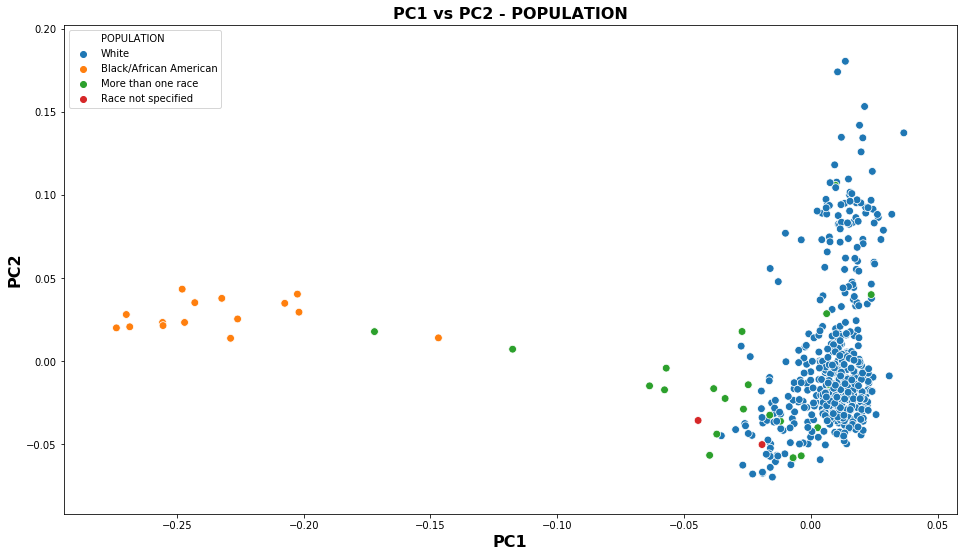

In [67]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PC1', y='PC2', hue='POPULATION', data=hm_pca, s=60)
plt.title('PC1 vs PC2 - POPULATION', fontsize=16,fontweight="bold")
plt.xlabel('PC1',fontweight="bold",fontsize=16)
plt.ylabel('PC2',fontweight="bold",fontsize=16)

In [68]:
tmp = hm_pca[hm_pca["POPULATION"]=="White"]
tmp

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,POPULATION,STATUS
0,3000,3000,0.009055,-0.020989,-0.006450,0.004679,0.064548,-0.004622,-0.004768,-0.057430,...,NaN,NaN,NaN,NaN,01/2011,2011-01-19 12:44:58.0,NaN,01/2011,White,HC
1,3001,3001,0.010821,-0.010432,0.017466,0.008279,-0.033759,0.035920,-0.061804,-0.012103,...,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011,White,PD
2,3002,3002,0.010888,0.082272,-0.026729,-0.014567,-0.005203,-0.025331,0.001788,0.009354,...,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011,White,PD
3,3004,3004,0.014755,-0.023550,0.017395,-0.016206,-0.016462,0.023744,0.015236,-0.109621,...,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011,White,HC
4,3006,3006,0.014192,-0.011787,0.055575,0.078381,0.047014,0.001423,-0.031512,-0.033798,...,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011,White,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,4124,4124,0.016180,-0.011417,0.025328,0.031295,0.016272,-0.075886,0.044644,0.030776,...,NaN,NaN,NaN,NaN,02/2013,2013-02-22 12:57:46.0,NaN,02/2013,White,PD
516,4125,4125,0.003644,0.018138,0.034080,-0.007140,-0.033038,0.069820,0.027495,-0.010757,...,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013,White,PD
517,4126,4126,0.011471,0.003224,-0.010949,-0.052772,0.017001,-0.005149,0.093209,-0.064223,...,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013,White,PD
518,4136,4136,0.006499,-0.035969,-0.029837,-0.062571,-0.038873,-0.039735,0.090198,0.019964,...,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013,White,PD


In [69]:
tmp.iloc[:,0:2].to_csv("Data/QC/IDs_qc.txt", header=False, index=False, sep=" ")

In [70]:
!plink --bfile Data/QC/PPMI_merged_autosomal_hwe --keep Data/QC/IDs_qc.txt --make-bed --out Data/QC/White

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/White.log.
Options in effect:
  --bfile Data/QC/PPMI_merged_autosomal_hwe
  --keep Data/QC/IDs_qc.txt
  --make-bed
  --out Data/QC/White

32768 MB RAM detected; reserving 16384 MB for main workspace.
128957 variants loaded from .bim file.
520 people (341 males, 179 females) loaded from .fam.
--keep: 480 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 480 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.996632.
128957 variants and 480 people pass filters and QC.
Note: No phenotypes present.
--make-bed to Data

In [72]:
tmp = pd.read_csv("Data/QC/White.bim", sep="\t", header = None)
tmp

,0,1,2,3,4,5
0,1,exm269,0,881918,A,G
1,1,exm340_ver2,0,888659,T,C
2,1,exm348,0,889238,A,G
3,1,exm2264981,0,894573,G,A
4,1,exm912,0,949608,A,G
...,...,...,...,...,...,...
128952,22,rs9628185,0,51109992,C,T
128953,22,exm1624089,0,51117580,C,T
128954,22,exm2268429,0,51156078,A,G
128955,22,rs9628187,0,51156666,T,C


In [74]:
tmp = pd.read_csv("Data/QC/White.fam", sep=" ", header = None)
tmp

,0,1,2,3,4,5
0,3000,3000,0,0,2,-9
1,3001,3001,0,0,1,-9
2,3002,3002,0,0,2,-9
3,3004,3004,0,0,1,-9
4,3006,3006,0,0,2,-9
...,...,...,...,...,...,...
475,4124,4124,0,0,1,-9
476,4125,4125,0,0,1,-9
477,4126,4126,0,0,1,-9
478,4136,4136,0,0,1,-9


In [75]:
!plink --bfile Data/QC/White --pca 10 --out Data/QC/White

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/White.log.
Options in effect:
  --bfile Data/QC/White
  --out Data/QC/White
  --pca 10

32768 MB RAM detected; reserving 16384 MB for main workspace.
128957 variants loaded from .bim file.
480 people (317 males, 163 females) loaded from .fam.
Using up to 11 threads (change this with --threads).
Before main variant filters, 480 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996632.
128957 variants and 480 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete.
--pca: Results saved to Data/QC/White.eigenval and Data/QC/White.eigenvec .


Text(0, 0.5, 'PC2')

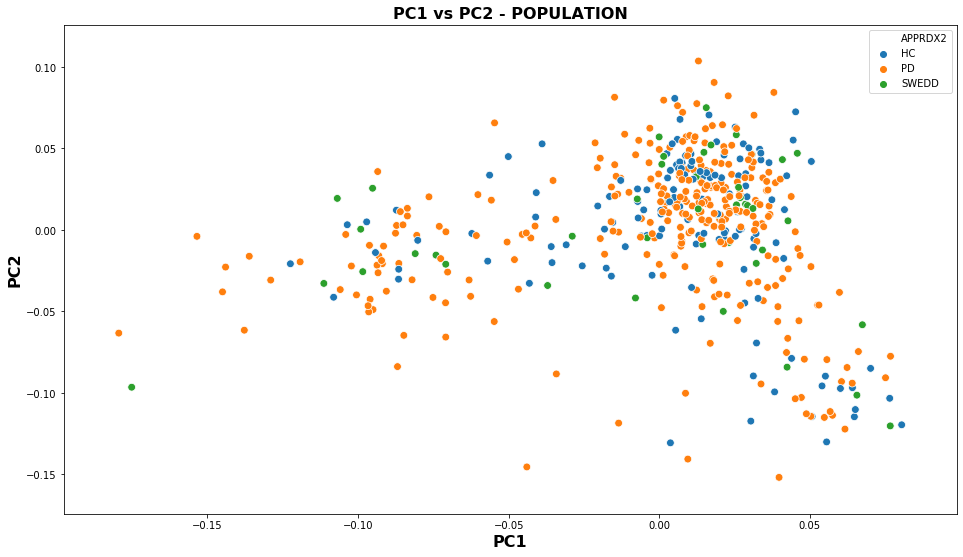

In [76]:
pca = pd.read_table('Data/QC/White.eigenvec', sep=' ', header=None)
cnames = ['FID','IID']
for i in range(1,11):
    cnames.append("PC"+str(i))
pca.columns = cnames

info_pca = pca.merge(ppmi_info, left_on=['IID'], right_on=['PATNO'])


apprdx = list()

for i in info_pca['APPRDX'].to_list():
    if(i==1):
        apprdx.append("PD")
    if(i==2):
        apprdx.append("HC")
    elif(i==3):
        apprdx.append("SWEDD")

info_pca['APPRDX2'] = apprdx


plt.figure(figsize=(16,9))
sns.scatterplot(x='PC1', y='PC2', hue='APPRDX2', data=info_pca, s=60)
plt.title('PC1 vs PC2 - POPULATION', fontsize=16,fontweight="bold")
plt.xlabel('PC1',fontweight="bold",fontsize=16)
plt.ylabel('PC2',fontweight="bold",fontsize=16)

In [87]:
info_pca_no_swedd = info_pca[info_pca["APPRDX2"]!="SWEDD"]
info_pca_no_swedd[["FID","IID"]].to_csv("Data/QC/NO_SWEDD.txt",header=False,index=False,sep=" ")

In [88]:
!plink --bfile Data/QC/White --keep Data/QC/NO_SWEDD.txt --make-bed --out Data/QC/White_no_swedd

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/White_no_swedd.log.
Options in effect:
  --bfile Data/QC/White
  --keep Data/QC/NO_SWEDD.txt
  --make-bed
  --out Data/QC/White_no_swedd

32768 MB RAM detected; reserving 16384 MB for main workspace.
128957 variants loaded from .bim file.
480 people (317 males, 163 females) loaded from .fam.
--keep: 436 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 436 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.996641.
128957 variants and 436 people pass filters and QC.
Note: No phenotypes present.
--make-bed to Data

In [89]:
!plink --bfile Data/QC/White_no_swedd --pca 10 --out Data/QC/White_no_swedd

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/QC/White_no_swedd.log.
Options in effect:
  --bfile Data/QC/White_no_swedd
  --out Data/QC/White_no_swedd
  --pca 10

32768 MB RAM detected; reserving 16384 MB for main workspace.
128957 variants loaded from .bim file.
436 people (289 males, 147 females) loaded from .fam.
Using up to 11 threads (change this with --threads).
Before main variant filters, 436 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996641.
128957 variants and 436 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete.
--pca: Results saved to Data/QC/White_no_swedd.eigenv

Text(0, 0.5, 'PC2')

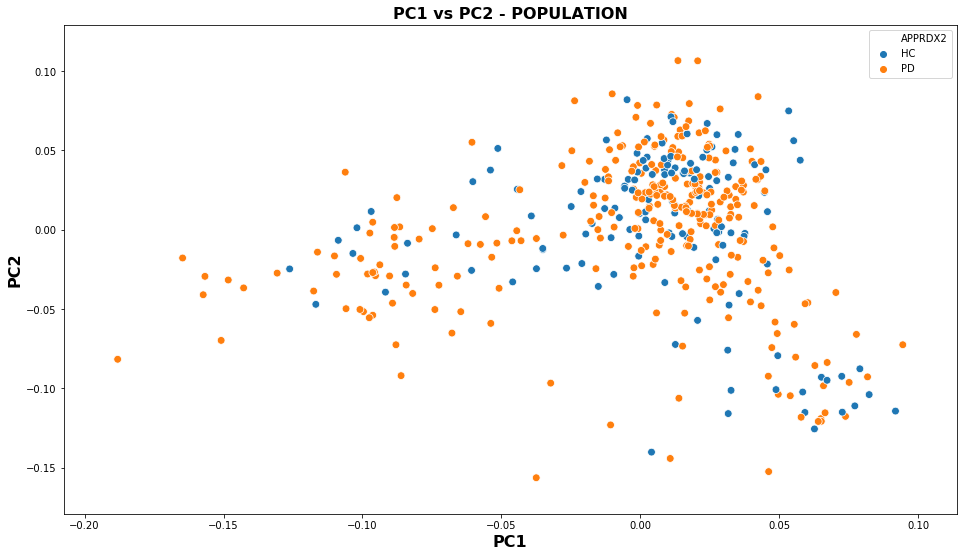

In [92]:
pca = pd.read_table('Data/QC/White_no_swedd.eigenvec', sep=' ', header=None)
cnames = ['FID','IID']
for i in range(1,11):
    cnames.append("PC"+str(i))
pca.columns = cnames

info_pca = pca.merge(ppmi_info, left_on=['IID'], right_on=['PATNO'])


apprdx = list()

for i in info_pca['APPRDX'].to_list():
    if(i==1):
        apprdx.append("PD")
    if(i==2):
        apprdx.append("HC")
    elif(i==3):
        apprdx.append("SWEDD")

info_pca['APPRDX2'] = apprdx


plt.figure(figsize=(16,9))
sns.scatterplot(x='PC1', y='PC2', hue='APPRDX2', data=info_pca, s=60)
plt.title('PC1 vs PC2 - POPULATION', fontsize=16,fontweight="bold")
plt.xlabel('PC1',fontweight="bold",fontsize=16)
plt.ylabel('PC2',fontweight="bold",fontsize=16)